# Supernova pre-workshop exercice

Florent Leclercq<br>
Imperial Centre for Inference and Cosmology, Imperial College London<br>
<a href="mailto:florent.leclercq@polytechnique.org">florent.leclercq@polytechnique.org</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Theory

In [2]:
def mu(z,Omega_m,h):
    return 25. - 5.*np.log10(h) + 5.*np.log10(D_L(z,Omega_m))

def D_L(z,Omega_m):
    return 3000.*(1+z)*(eta(1.,Omega_m) - eta(1/(1.+z),Omega_m))

def eta(a,Omega_m):
    s=((1.-Omega_m)/Omega_m)**(1/3.)
    return 2*np.sqrt(s**3+1.) * (1/a**4 - 0.1540*s/a**3 + 0.4304*s**2/a**2 + 0.19097*s**3/a + 0.066941*s**4)**(-1/8.)

In [3]:
zs=np.linspace(1e-3,2,100)
h=0.7
mus={}
for Omega_m in [0.2,0.3,0.4,0.5]:
    mus[Omega_m]=mu(zs,Omega_m,h)

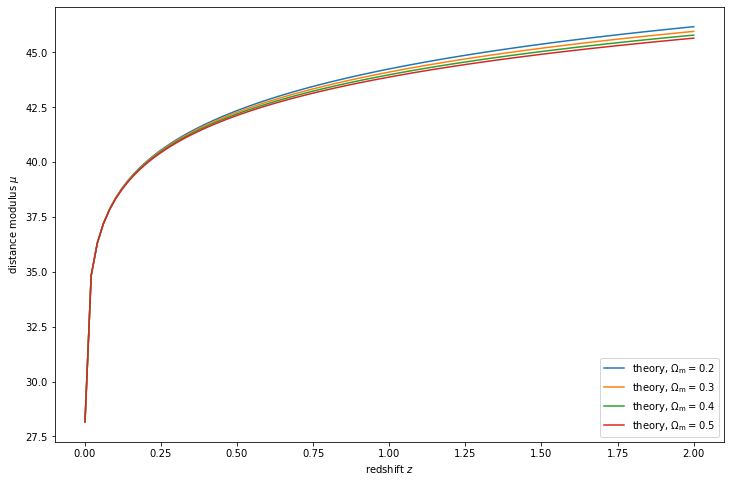

In [4]:
fig, ax = plt.subplots(figsize=(12,8))

for Omega_m in [0.2,0.3,0.4,0.5]:
    ax.plot(zs,mus[Omega_m],label="theory, $\Omega_\mathrm{m}=$"+str(Omega_m))

ax.set_xlabel("redshift $z$")
ax.set_ylabel("distance modulus $\mu$")
ax.legend(loc="lower right")

## Data

In [5]:
data = np.loadtxt("data/jla_mub.txt",unpack=True)

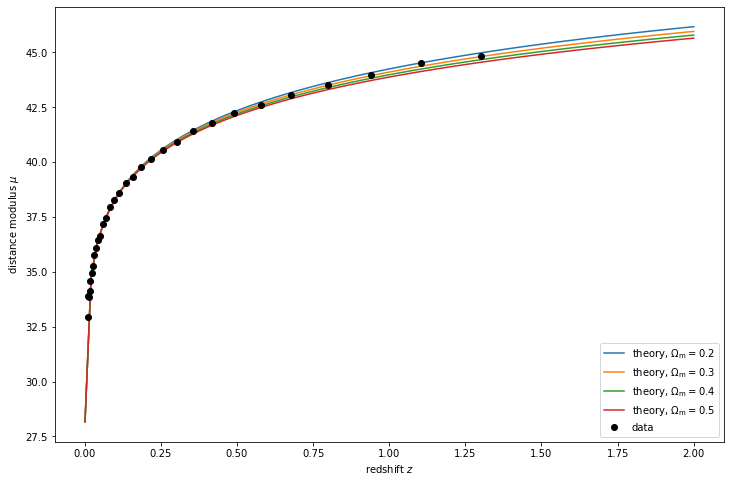

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

for Omega_m in [0.2,0.3,0.4,0.5]:
    ax.plot(zs,mus[Omega_m],label="theory, $\Omega_\mathrm{m}=$"+str(Omega_m))
ax.plot(data[0],data[1],ls="",marker="o",color="black",label="data")

ax.set_xlabel("redshift $z$")
ax.set_ylabel("distance modulus $\mu$")
ax.legend(loc="lower right")

## Simulated data

In [7]:
nsim=20
zs_sim = np.random.uniform(0.,2.,nsim)
h=0.7
Omega_m=0.3
mus_sim = mu(zs_sim,Omega_m,h)

In [8]:
sigma=0.1
errrors_sim = np.random.normal(0.,sigma,nsim)
mus_sim += errrors_sim

In [9]:
Omega_m=0.3
mus_h={}
for h in [0.6,0.7,0.8]:
    mus_h[h] = mu(zs, Omega_m, h)

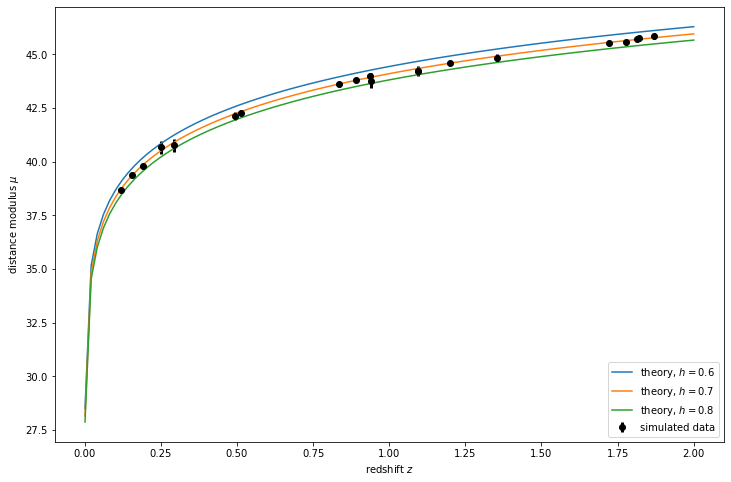

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

for h in [0.6,0.7,0.8]:
    ax.plot(zs,mus_h[h],label="theory, $h=$"+str(h))
ax.errorbar(zs_sim,mus_sim,2*errrors_sim,ls="",lw=3,marker="o",color="black",label="simulated data")

ax.set_xlabel("redshift $z$")
ax.set_ylabel("distance modulus $\mu$")
ax.legend(loc="lower right")